In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline




# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
realorfake=pd.read_csv(r"C:\Users\sai\Downloads\RealFake\fake_job_postings.csv",header=0)
realorfake_bk=realorfake.copy()
realorfake.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
realorfake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
realorfake.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
realorfake.salary_range.value_counts()

0-0              142
40000-50000       66
30000-40000       55
45000-67000       37
25000-30000       37
                ... 
21000-36000        1
32500-37500        1
110-140            1
175000-275000      1
100000-240000      1
Name: salary_range, Length: 874, dtype: int64

In [6]:
realorfake.department.value_counts()

Sales                           551
Engineering                     487
Marketing                       401
Operations                      270
IT                              225
                               ... 
Collections/Customer Service      1
1411                              1
MARKETING                         1
Server Administration             1
Acquisitions and Divesments       1
Name: department, Length: 1337, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
realorfake['salary_range']=le.fit_transform(realorfake['salary_range'])


In [8]:
realorfake["salary_range"] = realorfake["salary_range"].fillna(realorfake["salary_range"].mode()[0])

In [9]:
realorfake.salary_range.value_counts()

874    15012
0        142
560       66
441       55
614       37
       ...  
281        1
265        1
233        1
52         1
640        1
Name: salary_range, Length: 875, dtype: int64

In [10]:
realorfake.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range               0
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [11]:
realorfake.employment_type.value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
realorfake['employment_type']=le.fit_transform(realorfake['employment_type'])


In [13]:
realorfake.employment_type.value_counts()

1    11620
5     3471
0     1524
3      797
4      241
2      227
Name: employment_type, dtype: int64

In [14]:
realorfake["employment_type"] = realorfake["employment_type"].fillna(realorfake["employment_type"].mode()[0])

In [15]:
realorfake.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range               0
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type            0
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [16]:
realorfake.required_experience.value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [17]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
realorfake['required_experience']=le.fit_transform(realorfake['required_experience'])

In [18]:
realorfake["required_experience"] = realorfake["required_experience"].fillna(realorfake["required_experience"].mode()[0])

In [19]:
realorfake.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range               0
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type            0
required_experience        0
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [20]:
realorfake.required_education.value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [21]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
realorfake['required_education']=le.fit_transform(realorfake['required_education'])

In [22]:
realorfake["required_experience"] = realorfake["required_experience"].fillna(realorfake["required_experience"].mode()[0])

In [23]:
realorfake.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range               0
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type            0
required_experience        0
required_education         0
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [24]:
del realorfake['title']
del realorfake['location']
del realorfake['department']
del realorfake['company_profile']
del realorfake['description']
del realorfake['requirements']
del realorfake['benefits']
#del realorfake['employment_type']
#del realorfake['required_experience']
del realorfake['required_education']
del realorfake['industry']
del realorfake['function']


In [25]:
realorfake.isnull().sum()

job_id                 0
salary_range           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
fraudulent             0
dtype: int64

In [26]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in realorfake.columns:
    if col != 'fraudulent':
        IndepVar.append(col)

TargetVar = 'fraudulent'

x = realorfake[IndepVar]
y = realorfake[TargetVar]

In [27]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12516, 7), (5364, 7), (12516,), (5364,))

In [28]:
HT_Results=pd.read_csv(r"C:\Users\sai\Desktop\HTResults.csv",header=0)
HT_Results.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [29]:
realorfake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_id               17880 non-null  int64
 1   salary_range         17880 non-null  int32
 2   telecommuting        17880 non-null  int64
 3   has_company_logo     17880 non-null  int64
 4   has_questions        17880 non-null  int64
 5   employment_type      17880 non-null  int32
 6   required_experience  17880 non-null  int32
 7   fraudulent           17880 non-null  int64
dtypes: int32(3), int64(5)
memory usage: 908.1 KB


Model Name:  LogisticRegression()
Confusion matrix : 
 [[   3  268]
 [   6 5087]]
Outcome values : 
 3 268 6 5087
Classification report : 
               precision    recall  f1-score   support

           1       0.33      0.01      0.02       271
           0       0.95      1.00      0.97      5093

    accuracy                           0.95      5364
   macro avg       0.64      0.50      0.50      5364
weighted avg       0.92      0.95      0.93      5364

Accuracy : 94.9 %
Precision : 33.3 %
Recall : 1.1 %
F1 Score : 0.021
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.5 %
roc_auc_score: 0.505


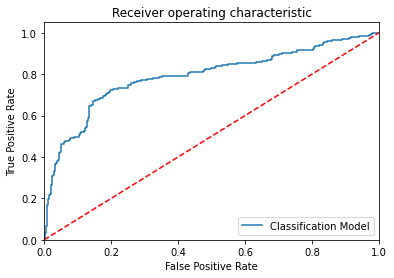

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 170  101]
 [ 103 4990]]
Outcome values : 
 170 101 103 4990
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.63      0.62       271
           0       0.98      0.98      0.98      5093

    accuracy                           0.96      5364
   macro avg       0.80      0.80      0.80      5364
weighted avg       0.96      0.96      0.96      5364

Accuracy : 96.2 %
Precision : 62.3 %
Recall : 62.7 %
F1 Score : 0.625
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 80.4 %
roc_auc_score: 0.804


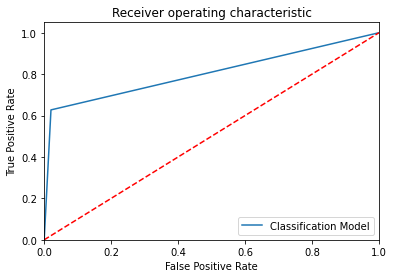

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 172   99]
 [  65 5028]]
Outcome values : 
 172 99 65 5028
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.63      0.68       271
           0       0.98      0.99      0.98      5093

    accuracy                           0.97      5364
   macro avg       0.85      0.81      0.83      5364
weighted avg       0.97      0.97      0.97      5364

Accuracy : 96.9 %
Precision : 72.6 %
Recall : 63.5 %
F1 Score : 0.677
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 81.1 %
roc_auc_score: 0.811


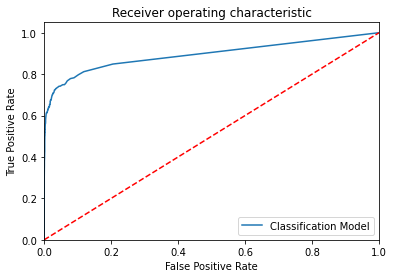

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 160  111]
 [  76 5017]]
Outcome values : 
 160 111 76 5017
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.59      0.63       271
           0       0.98      0.99      0.98      5093

    accuracy                           0.97      5364
   macro avg       0.83      0.79      0.81      5364
weighted avg       0.96      0.97      0.96      5364

Accuracy : 96.5 %
Precision : 67.8 %
Recall : 59.0 %
F1 Score : 0.631
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 78.8 %
roc_auc_score: 0.788


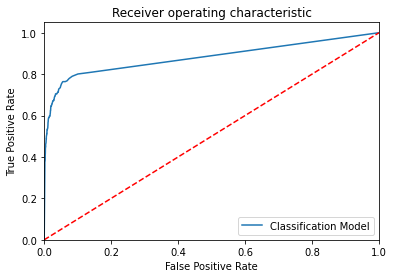

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 133  138]
 [  32 5061]]
Outcome values : 
 133 138 32 5061
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.49      0.61       271
           0       0.97      0.99      0.98      5093

    accuracy                           0.97      5364
   macro avg       0.89      0.74      0.80      5364
weighted avg       0.96      0.97      0.96      5364

Accuracy : 96.8 %
Precision : 80.6 %
Recall : 49.1 %
F1 Score : 0.61
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 74.2 %
roc_auc_score: 0.742


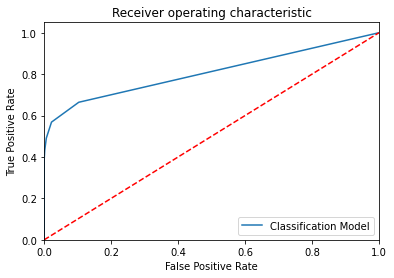

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 170  101]
 [  54 5039]]
Outcome values : 
 170 101 54 5039
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.63      0.69       271
           0       0.98      0.99      0.98      5093

    accuracy                           0.97      5364
   macro avg       0.87      0.81      0.84      5364
weighted avg       0.97      0.97      0.97      5364

Accuracy : 97.1 %
Precision : 75.9 %
Recall : 62.7 %
F1 Score : 0.687
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 80.8 %
roc_auc_score: 0.808


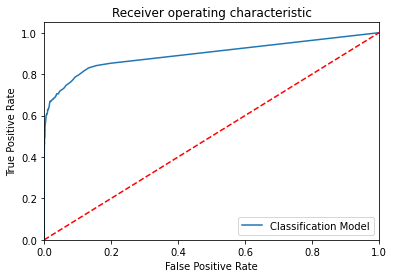

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[ 121  150]
 [   4 5089]]
Outcome values : 
 121 150 4 5089
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.45      0.61       271
           0       0.97      1.00      0.99      5093

    accuracy                           0.97      5364
   macro avg       0.97      0.72      0.80      5364
weighted avg       0.97      0.97      0.97      5364

Accuracy : 97.1 %
Precision : 96.8 %
Recall : 44.6 %
F1 Score : 0.611
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 72.2 %
roc_auc_score: 0.723


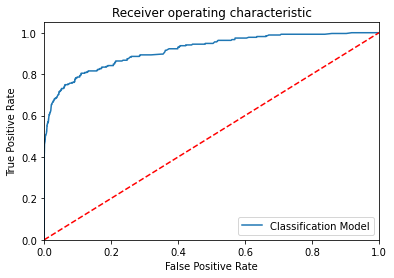

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 146  125]
 [  17 5076]]
Outcome values : 
 146 125 17 5076
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.54      0.67       271
           0       0.98      1.00      0.99      5093

    accuracy                           0.97      5364
   macro avg       0.94      0.77      0.83      5364
weighted avg       0.97      0.97      0.97      5364

Accuracy : 97.4 %
Precision : 89.6 %
Recall : 53.9 %
F1 Score : 0.673
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 76.8 %
roc_auc_score: 0.768


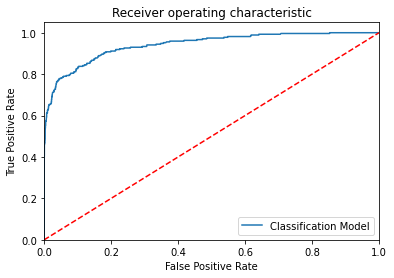

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  29  242]
 [ 113 4980]]
Outcome values : 
 29 242 113 4980
Classification report : 
               precision    recall  f1-score   support

           1       0.20      0.11      0.14       271
           0       0.95      0.98      0.97      5093

    accuracy                           0.93      5364
   macro avg       0.58      0.54      0.55      5364
weighted avg       0.92      0.93      0.92      5364

Accuracy : 93.4 %
Precision : 20.4 %
Recall : 10.7 %
F1 Score : 0.14
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 54.2 %
roc_auc_score: 0.542


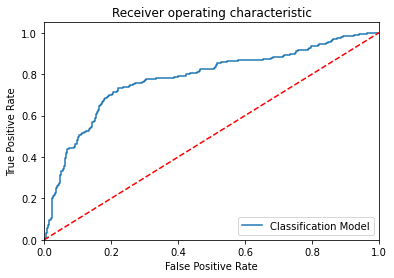

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(kernel='linear', probability=True)
Confusion matrix : 
 [[   1  270]
 [  10 5083]]
Outcome values : 
 1 270 10 5083
Classification report : 
               precision    recall  f1-score   support

           1       0.09      0.00      0.01       271
           0       0.95      1.00      0.97      5093

    accuracy                           0.95      5364
   macro avg       0.52      0.50      0.49      5364
weighted avg       0.91      0.95      0.92      5364

Accuracy : 94.8 %
Precision : 9.1 %
Recall : 0.4 %
F1 Score : 0.007
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 50.1 %
roc_auc_score: 0.501


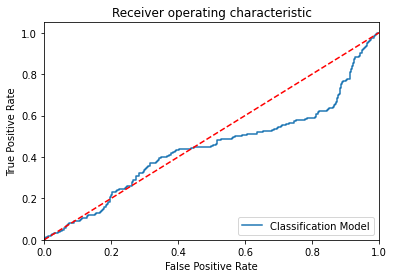

-----------------------------------------------------------------------------------------------------


In [30]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters
ModelSVM = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True,probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False,max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, modelBAG,ModelGB, ModelLGB, ModelGNB,ModelSVM]
for models in MM:
            
     #Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    HT_Results = HT_Results.append(new_row, ignore_index=True)

In [31]:
HT_Results

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),3,268,6,5087,0.949,0.333,0.011,0.021,0.999,0.053,0.504946,0.505
1,DecisionTreeClassifier(),170,101,103,4990,0.962,0.623,0.627,0.625,0.980,0.605,0.803541,0.804
2,"(DecisionTreeClassifier(max_features='sqrt', r...",172,99,65,5028,0.969,0.726,0.635,0.677,0.987,0.663,0.810962,0.811
3,"(ExtraTreeClassifier(random_state=1092226456),...",160,111,76,5017,0.965,0.678,0.590,0.631,0.985,0.615,0.787742,0.788
4,KNeighborsClassifier(),133,138,32,5061,0.968,0.806,0.491,0.610,0.994,0.615,0.742246,0.742
5,(DecisionTreeClassifier(random_state=184697077...,170,101,54,5039,0.971,0.759,0.627,0.687,0.989,0.675,0.808352,0.808
6,([DecisionTreeRegressor(criterion='friedman_ms...,121,150,4,5089,0.971,0.968,0.446,0.611,0.999,0.647,0.722855,0.722
7,LGBMClassifier(),146,125,17,5076,0.974,0.896,0.539,0.673,0.997,0.683,0.767704,0.768
8,GaussianNB(),29,242,113,4980,0.934,0.204,0.107,0.140,0.978,0.116,0.542412,0.542
9,"SVC(kernel='linear', probability=True)",1,270,10,5083,0.948,0.091,0.004,0.007,0.998,0.008,0.500863,0.501
